# Goals:

Newborn's name expresses the yearning and pursuit of intimate, harmonious and orderly interpersonal relationships, and this yearning and pursuit is a eternal theme of human society.

This project uses data visualization, statistical exploration and data analysis to have a glance on how the trend of the baby's name is changing, and the probable social and/or historical reasons behind the scene. The visualization part is following Shneiderman’s mantra: **Overview first, zoom and filter, then details-on-demand.** 

1. Intergrate all the dataset first.
2. Calculate the yearly trend of some specific name.
3. Calculate the rank of some specific name.
4. Calculate the most popular name of each year, show the names in use that have been increased or decreased the most.
5. Analyze the trend of names: diversity, length, the change of spell, etc.
6. Analyze the external factors of name choose: biblical names, famous people, demographic change, etc.



# data source:
[Popular baby names](https://www.ssa.gov/oact/babynames/limits.html)
The dataset we use here is the 'National Data' from Social Security Admnistration.



In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10 

%matplotlib inline

In [66]:
biblename = pd.read_excel (r'dataset/biblicalnames.xlsx') #for an earlier version of Excel, you may need to use the file extension of 'xls'

In [65]:
#we have multiple files and we want to combine all the files together into one dataframe
# pandas.concat
years = range(1880,2019) # our data up to 2018
pieces = []
columns = ['name','sex','births']
for year in years:
    path = 'dataset/babynames/yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces,ignore_index=True) # concat 默认会逐行黏合，所以此处 ignore_index = True would work 

In [64]:
def add_prop(group): #calculate the proportion out of all names 
    group['prop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

A glimpse on the total births of first 1000 names by sex over the years:  
The x-axis corresponds to year, and the y-axis corresponds to total sum of top 1000 names of each year. 

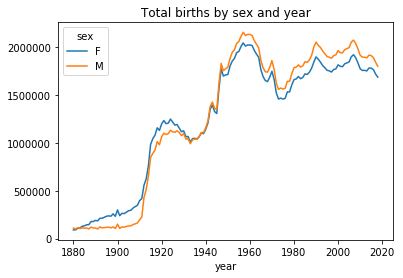

In [63]:
# use groupby or pivot table to cluster the data by years and sex
total_births = names.pivot_table('births',index = 'year', columns ='sex',aggfunc=sum)
total_births.plot(title = 'Total births by sex and year')

In [ ]:
# groupby year and sex
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending = False)[:1000])
top1000 = pd.concat(pieces,ignore_index = True)

In [7]:
topfemale = top1000[top1000.sex=='F']
topmale =  top1000[top1000.sex=='F']

In [8]:
def get_top_name(sex):
    if(sex=='F'):
        topname = top1000[top1000.sex=='F'].groupby(['name']).births.sum().sort_values(ascending=False)
    elif(sex=='M'):
        topname = top1000[top1000.sex=='M'].groupby(['name']).births.sum().sort_values(ascending=False)
    else:
        topname = top1000.groupby(['name']).births.sum().sort_values(ascending=False)
    return topname

In [ ]:
print(get_top_name('F')[:10])
print(get_top_name('M')[:10])

### Baby Names Trend 
#### Top10 Newborn Girl and Boys Names in US from 1880 to 2018


The following graph shows the top10 girls' names and boys' names over the years. Among these names, four out of ten girl names are biblical names, and one of them is Bible related; and six of the boy names are biblical names, which implies that Christianity as a religion plays a huge role in the US society. Usually a baby's name is given by parents or other family members, so it is not necesarily represents the baby's belif; but it certianly implies the family's belif and even the sociaty trends. By statistics, Christian takes up to 70.6% in the US, therefore Christianity life is an important part of social life, and newborn babys' given name is an evidence of that. The name of the religious believer is obviously different from the secular people, most of them are biblical names, which are chosen from Bible; but in the graphs below also shows that the names nowadays are getting more diverse -- there are more choices of babynames other than biblical names.




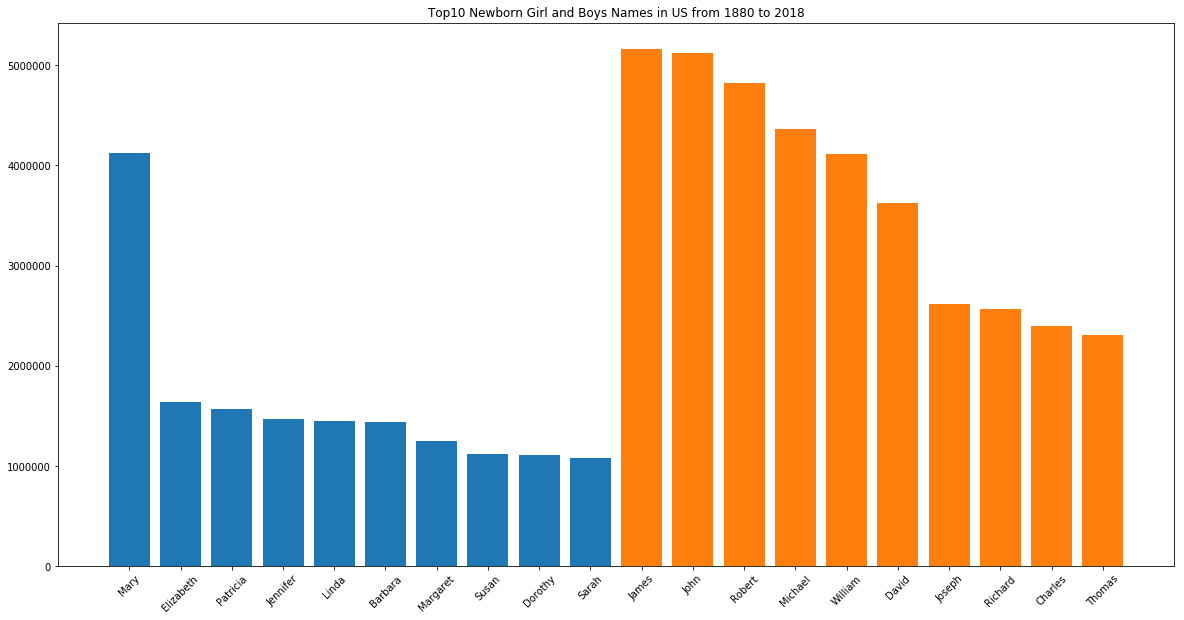

In [69]:
fig,axes = plt.subplots(1,1,figsize=(20,10))
plt.bar(get_top_name('F')[:10].index,get_top_name('F')[:10])
plt.bar(get_top_name('M')[:10].index,get_top_name('M')[:10])
plt.title('Top10 Newborn Girl and Boys Names in US from 1880 to 2018')
plt.xticks(rotation = 45)
plt.show()

### Meaning of the names:




#### Girls:

Mary: Biblical name, meaning Beloved.  
Elizabeth: Biblical name, meaning 'My God is an oath'  
Patricia: meaning "noble", it is the feminine form of the masculine given name Patrick.  
Jennifer: meaning "the fair one"  
Linda: meaning "flexible, soft, mild".   
Barbara: meaning"strange or foreign"    
Margaret: meaning "pearl" or "cluster of blossoms".  
Susan: biblical, to be joyful”. Susan, from the ancient Persian Shushun, is the name of a city, which is often mentioned in the Bible. The city is full of beautiful lilies and has a reputation as a city of lilies. Usually the name is given to the girls to wish them love beauty and love flowers.  
Dorothy:  Gift of God  
Sarah: biblical name, Princess.  

#### Boys:
James: biblical, meaning supplanter, man who follows. A classic boys' name derived from the Hebrew name Jacob.  
John: biblical, meaning God is gracious. In addition to its meaning as a considerations another reason is that there are two important figures in the Bible called John, one is "Baptist John" and the other is "Evangelist John".  
Robert: meaning "bright fame",   
Michael: biblical, meaning "who is like God?".   
William: Resolute protector   
David: biblical, meaning "beloved"   
Joseph: biblical, meaning May Jehovah add/give increase.   
Richard:  "strong in rule".    
Charles: meaning "free man".    
Thomas: biblical, meaning 'twin'  

The graph below represents the top 1000 name trends for boys and girls over the years, The x-axis corresponds to year, and the y-axis shows an estimate of the central tendency for the year. The shadows represent the confidence interval for that estimates.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Top1000 names trend for boys and girs from 1880 to 2018')

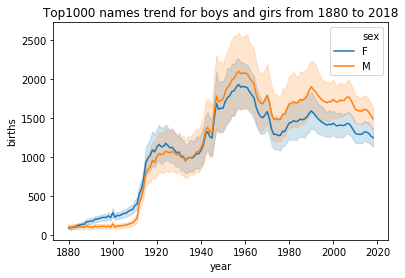

In [10]:
#Top10 names trend for boys and girs from 1880 to 2018
import seaborn as sns
sns.lineplot(data=top1000, x='year', y='births', hue='sex').set_title('Top1000 names trend for boys and girs from 1880 to 2018')

The next set of graphs represent the trend of top 10 names over the years from 1880 to 2018; the first set of names are for girs and the second set are for boys.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002462B01F198>,
      dtype=object)

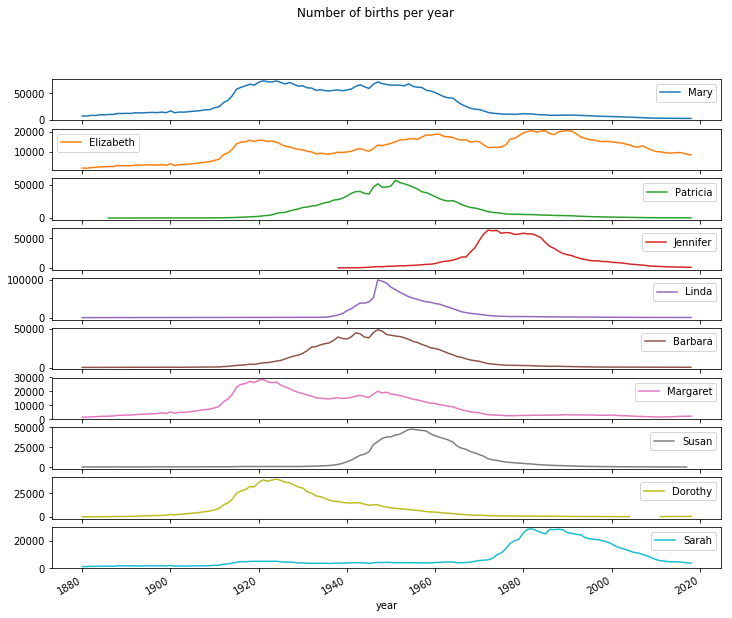

In [80]:
# analyze the trend of the names
total_births = top1000.pivot_table('births',index = 'year', columns = 'name',aggfunc=sum)
total_births.info()
subset = total_births[['Mary','Elizabeth','Patricia','Jennifer','Linda','Barbara','Margaret','Susan','Dorothy','Sarah']]
subset.plot(subplots=True,figsize=(12,10),grid=False, title = 'Number of births per year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002463285FDA0>,
      dtype=object)

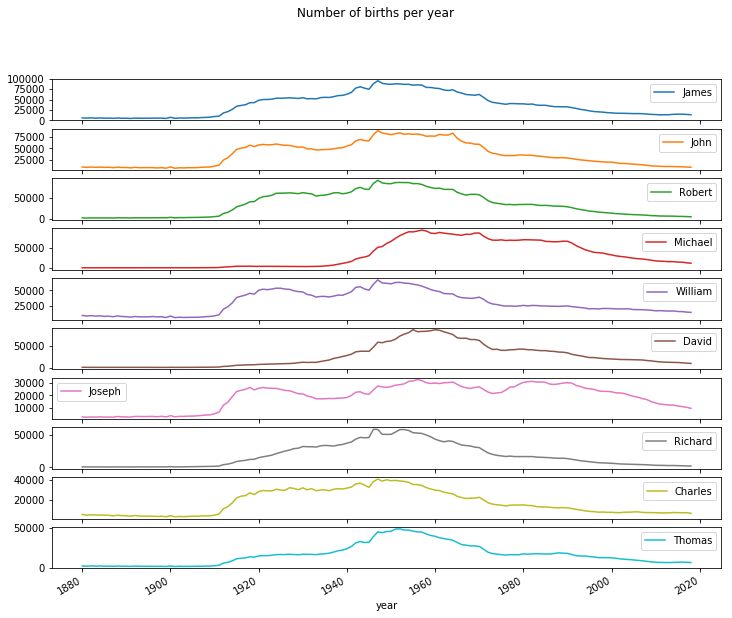

In [81]:
subset = total_births[['James','John','Robert','Michael','William','David','Joseph','Richard','Charles','Thomas']]
subset.plot(subplots=True,figsize=(12,10),grid=False, title = 'Number of births per year')

These graphs show that all the top 10 names for boys and girls have a decrease tendency, which implies that there are more choices of names nowadays, in another word, the factors of chosing a babyname are getting more diverse. They could be historical event, race, religious belif, backgroud, sexual orientation, political beliefs, or other ideologies. Let's have a deeper look on the data and further explore the trends and reasons behind it.

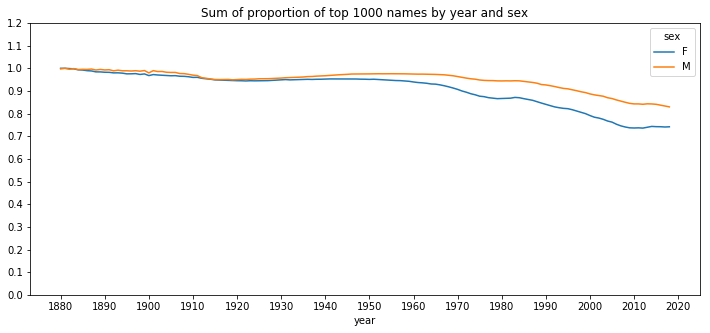

In [84]:
# use year and sex to do cluster and plot

table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of proportion of top 1000 names by year and sex',figsize=(12,5),yticks=np.linspace(0,1.2,13),xticks=range(1880,2021,10))


The trends of the proportion of top 1000 names for both boys and girls are getting decreased，implies that there are more choices of names.

In [13]:
# know which name is at the 50% of the total popularity 
# use prop's cumsum to calculate the total sum, and use searchsorted to get the position of the cumsum, and use a threthold 0.5 to make sure the right position

prop_cumsum = top1000.sort_values(by='prop',ascending= False).prop.cumsum()
print(prop_cumsum[:10])
prop_cumsum.values.searchsorted(0.5) +1 #0 indexed 


942      0.087383
2880     0.174427
943      0.260697
6877     0.345705
2881     0.430317
4877     0.514382
8877     0.596414
4878     0.678201
12877    0.759674
10877    0.840899
Name: prop, dtype: float64


6

In [14]:
def get_names_of_the_year(sex,year):
    df = top1000[top1000.sex==sex]
    df = df[df.year==year]
    return df

In [15]:
get_names_of_the_year('M',2018)

,name,sex,births,year,prop
276877,Liam,M,19837,2018,0.011018
276878,Noah,M,18267,2018,0.010146
276879,William,M,14516,2018,0.008063
276880,James,M,13525,2018,0.007512
276881,Oliver,M,13389,2018,0.007437
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [16]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending= False).prop.cumsum()
    return group.values.searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2014,242,131
2015,243,135
2016,249,139


The x-axis represents years, the y-axis is the position at the 50th quantile of all newborn names of the year. This graph is designed to show the diversity of the choices of names from 1880 till now.

Text(0,0.5,'Position at the 50th quantile')

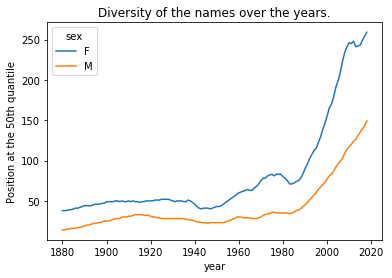

In [90]:
diversity.plot(title='Diversity of the names over the years.')
plt.ylabel('Position at the 50th quantile')
# girls' name has more diversity than boys

In [ ]:
### Last character of the names 
Now let's have a look the on the names changing.  
First the last character of the names draw my interests. It might reflect some interesting facts about the names.

In [18]:
get_last_char=lambda x:x[-1]
last_letters = names.name.map(get_last_char)
last_letters.name='last_letter'
table = names.pivot_table('births',index=last_letters, columns = ['sex','year'],aggfunc = sum)
subtable = table.reindex(columns=[1880,1900,1950,2000,2018],level ='year')
subtable.head()

sex                F                                                M  \
year            1880      1900      1950      2000      2018     1880   
last_letter                                                             
a            31446.0   89900.0  576581.0  676038.0  646970.0    776.0   
b                NaN       NaN      17.0     372.0     576.0    509.0   
c                NaN       NaN      15.0     525.0    1115.0    349.0   
d              609.0    3670.0    4409.0    4383.0    3516.0   9177.0   
e            33381.0  107068.0  376892.0  318445.0  300769.0  13493.0   

sex                                                 
year            1900      1950      2000      2018  
last_letter                                         
a              870.0    4029.0   40862.0   30691.0  
b              372.0    1634.0   50925.0   22563.0  
c              299.0    6493.0   27022.0   19338.0  
d            15484.0  263738.0   64334.0   41585.0  
e            22724.0  168692.0  148928.0  119409.0

In [19]:
subtable.sum()

sex  year
F    1880      90994.0
     1900     299798.0
     1950    1713065.0
     2000    1815295.0
     2018    1686961.0
M    1880     110490.0
     1900     150480.0
     1950    1790437.0
     2000    1963202.0
     2018    1800392.0
dtype: float64

In [20]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                                                 M  \
year             1880      1900      1950      2000      2018      1880   
last_letter                                                               
a            0.345583  0.299869  0.336579  0.372412  0.383512  0.007023   
b                 NaN       NaN  0.000010  0.000205  0.000341  0.004607   
c                 NaN       NaN  0.000009  0.000289  0.000661  0.003159   
d            0.006693  0.012242  0.002574  0.002414  0.002084  0.083057   
e            0.366848  0.357134  0.220010  0.175423  0.178290  0.122120   
...               ...       ...       ...       ...       ...       ...   
v                 NaN       NaN       NaN  0.000023  0.000270  0.000299   
w                 NaN  0.000020  0.000025  0.000468  0.003556  0.007720   
x                 NaN       NaN  0.000032  0.000407  0.001782  0.002751   
y            0.115030  0.096281  0.143432  0.135705  0.112753  0.075763   
z            0.001165  0.002035  0.000348  0.000845  0.000627  0.000262   

sex                                                  
year             1900      1950      2000      2018  
last_letter                                          
a            0.005781  0.002250  0.020814  0.017047  
b            0.002472  0.000913  0.025940  0.012532  
c            0.001987  0.003626  0.013764  0.010741  
d            0.102897  0.147304  0.032770  0.023098  
e            0.151010  0.094218  0.075860  0.066324  
...               ...       ...       ...       ...  
v            0.000126  0.000016  0.000501  0.001707  
w            0.006306  0.003918  0.028410  0.010888  
x            0.003509  0.001785  0.005445  0.011605  
y            0.084676  0.141468  0.073002  0.048798  
z            0.000153  0.000151  0.001504  0.001871  

[26 rows x 10 columns]

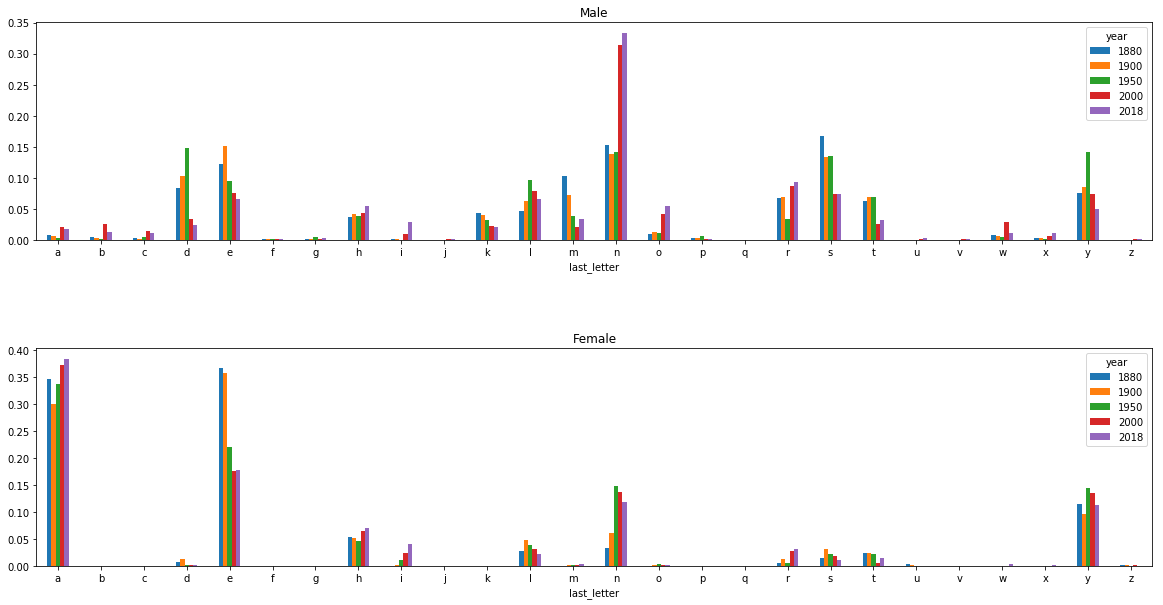

In [21]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize=(20,10))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female')


In [22]:
letter_prop = table/table.sum()
def letters_trends(letters,sex):
    '''
    @letters, an array of the letters
    @sex, 'M' or 'F'
    '''
    df = letter_prop.loc[letters,sex].T
    return df

In [23]:
M_letters = ['d','e','n','s','y']
F_letters = ['a','e','n','y']
M_trend = letters_trends(M_letters,'M')
F_trend = letters_trends(F_letters,'F')

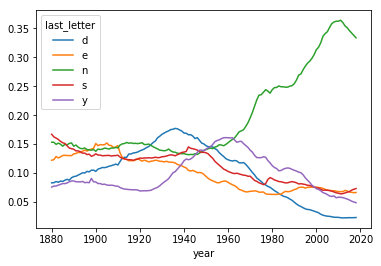

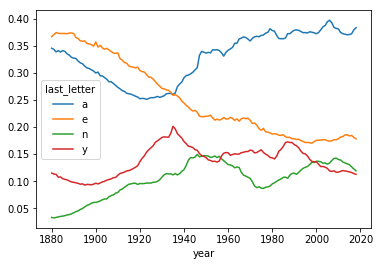

In [24]:
M_trend.plot() 
F_trend.plot() 

### Girls's names becomes boys' and vice versa

There is the difference between boy's and girl's name in the use of the characters. Generally speaking, when we come into seeing a new name, we could often guess the gender, and mostly could get the correct answer. Besides the noticable differences on the names, unisex names also becomes a trend.

Take Lesley as an example, the 'lesl-likeness' name has a sharp turning point around 1945, which more girls and less boys use this name. Silimar to the name 'Taylor', 'patric-likeness' names, and etc.

In [25]:
all_names = pd.Series(top1000.name.unique())
def plot_similar_names_with_sex(name):
    name_like =  all_names[all_names.str.lower().str.contains(name)]
    filtered = top1000[top1000.name.isin(name_like)]
    filtered.groupby('name').births.sum()
    table = filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')
    table = table.div(table.sum(1),axis=0)
    table.plot(style={'M':'k-','F':'k--'},color='grey')

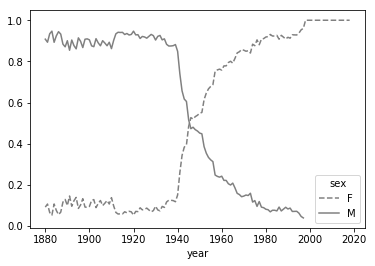

In [26]:
plot_similar_names_with_sex('lesl')

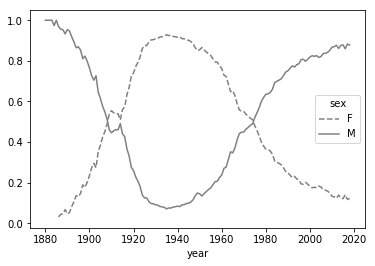

In [62]:
plot_similar_names_with_sex('patric')

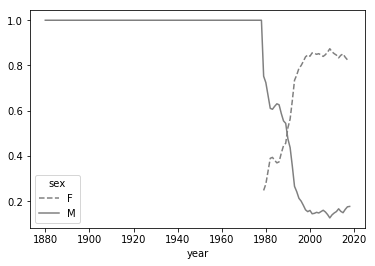

In [27]:
plot_similar_names_with_sex('taylor')

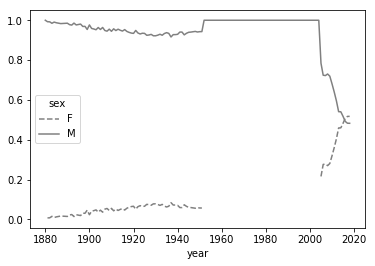

In [28]:
plot_similar_names_with_sex('charlie')

### Biblical Names

In [29]:
'Aaron' in biblename.name.values

True

In [43]:
bib_name = [name for name in all_names  if name in biblename.name.values]
# percentage of the names chosen from bible
bib_name_percentage = len(bib_name)/all_names.count()

In [44]:
bib_name_percentage = len(bib_name)/len(names.name)
bib_name_percentage

0.00011905698690781923

In [37]:
# percentage of the biblical names of all time
bib_name_birth_count=[]
for i,row in names.iterrows():
    if row.name in biblename.name.values:
        bible_name_birth_count.append(row.births)
#bib_name_birth_count = [row.births for i,row in names.iterrows() if row.name in biblename.name.values]


In [38]:
bib_name_birth_count

[]

In [41]:
a = []
a.append(row.births)
a

[5]

In [ ]:
bib_name_percentage = len(bib_name_birth_count)/names.count()
bib_name_percentage

In [ ]:
len(bib_name)

References:

[1] data 
[2] 